In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tike

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='Times New Roman')
plt.rcParams["mathtext.fontset"] = 'stix'

#width = 3.37 or 6.69 eps are preferred

In [3]:
import matplotlib.gridspec

def grid_fig(a, b):
    
    gs = matplotlib.gridspec.GridSpec(4, 4)
    
    for i, step in enumerate([8, 16, 32, 64]):
        for j, flux in enumerate([0.01, 0.1, 1, 10]):
            
            plt.subplot(gs[i, j])
            filename = "grid/{}{:03d}.{:03g}/psi-500-{}.jpg".format(a, step, flux, b)
            print(filename)
            try:
                img = plt.imread(filename)
            except FileNotFoundError:
                img = plt.imread('/home/beams/DCHING/Pictures/9604511.jpg')
            plt.imshow(img)
            plt.axis('off')
            
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.01, wspace=0.01)
            

In [37]:
import matplotlib.gridspec

def grid_summary_fig(a, b, col=0):
    
    divide = 0.25
    gs = matplotlib.gridspec.GridSpec(4, 3)
    gs.update(left=0.1, right=1-0.03, bottom=divide+0.01, top=1-0.05, hspace=0.0, wspace=0.02)
    gs1 = matplotlib.gridspec.GridSpec(1, 2)
    gs1.update(left=0.05, right=1-0.05, bottom=0.03, top=divide-0.01, hspace=0.03, wspace=0.03)
    
    row_labels = [
      'low flux\n0.071w shift',
      'low flux\n0.566w shift',
      'high flux\n0.071w shift',
      'high flux\n0.566w shift',
    ]
    
    for j, step in enumerate([8, 64]):
        for i, flux in enumerate([0.1, 10]):
            plt.subplot(gs[2*i + j, col])
            filename = "grid/{}{:03d}.{:03g}/psi-500-{}.jpg".format(a, step, flux, 'amp')
            print(filename)
            try:
                img = plt.imread(filename)
            except FileNotFoundError:
                img = plt.imread('/home/beams/DCHING/Pictures/9604511.jpg')
            
            # Simple phase shifting so that reconstructions align with the true result
            filename = "grid/{}{:03d}.{:03g}/psi-500".format(a, step, flux)
            print(filename)
            try:
                data = np.load(filename + ".npy")
                phase = np.angle(data)
#                 print(phase.shape)
                phase = phase - np.mean(phase[0:200, 0:32]) + np.pi
                phase = np.fmod(phase, np.pi)
#                 phase[118:138, 0:32] = 0
                print(np.min(phase), np.max(phase))
                plt.imsave(
                    filename + '-phz.jpg',
                    phase,
                    vmin=-np.pi,
                    vmax=np.pi,
                    cmap=plt.cm.twilight,
                )
            except FileNotFoundError:
                pass
            
            filename = "grid/{}{:03d}.{:03g}/psi-500-{}.jpg".format(a, step, flux, 'phz')
            print(filename)
            try:
                img2 = plt.imread(filename)
            except FileNotFoundError:
                img2 = plt.imread('/home/beams/DCHING/Pictures/9604511.jpg')
            
            plt.imshow(np.concatenate([img, img2], axis=1))
            plt.xticks([])
            plt.yticks([])
            if col == 0:
                plt.ylabel(row_labels[2*i + j])
                
            if j + i == 0:
                if col == 2:
                    plt.title('MURA')
                if col == 1:
                    plt.title('Random Phase')
                if col == 0:
                    plt.title('Large')
    
    

    
    plt.subplot(gs1[0, 0])
    plt.imshow(
        plt.imread('/home/beams/DCHING/Pictures/images/Cryptomeria_japonica-0256.tif') / 255,
        vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('amplitude')
    plt.colorbar()
    
    plt.subplot(gs1[0, 1])
    plt.imshow(
        plt.imread('/home/beams/DCHING/Pictures/images/Erdhummel_Bombus_terrestris-0256.tif') / 255 * np.pi,
        cmap=plt.cm.twilight, vmin=-np.pi, vmax=np.pi)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('phase')
    plt.colorbar()

grid/008.0.1/psi-500-amp.jpg
grid/008.0.1/psi-500
-0.9511106 3.1415565
grid/008.0.1/psi-500-phz.jpg
grid/008.010/psi-500-amp.jpg
grid/008.010/psi-500
-1.0182226 3.141586
grid/008.010/psi-500-phz.jpg
grid/064.0.1/psi-500-amp.jpg
grid/064.0.1/psi-500
-0.19655538 3.1415422
grid/064.0.1/psi-500-phz.jpg
grid/064.010/psi-500-amp.jpg
grid/064.010/psi-500
-0.56965137 3.1415844
grid/064.010/psi-500-phz.jpg
grid/r008.0.1/psi-500-amp.jpg
grid/r008.0.1/psi-500
5.4121017e-05 3.141487
grid/r008.0.1/psi-500-phz.jpg
grid/r008.010/psi-500-amp.jpg
grid/r008.010/psi-500
0.0032908916 3.1405458
grid/r008.010/psi-500-phz.jpg
grid/r064.0.1/psi-500-amp.jpg
grid/r064.0.1/psi-500
-0.44180632 3.1415565
grid/r064.0.1/psi-500-phz.jpg
grid/r064.010/psi-500-amp.jpg
grid/r064.010/psi-500
-0.57579684 3.1415594
grid/r064.010/psi-500-phz.jpg
grid/m008.0.1/psi-500-amp.jpg
grid/m008.0.1/psi-500
-0.6966293 3.141583
grid/m008.0.1/psi-500-phz.jpg
grid/m008.010/psi-500-amp.jpg
grid/m008.010/psi-500
-0.54089284 3.1415923
grid/

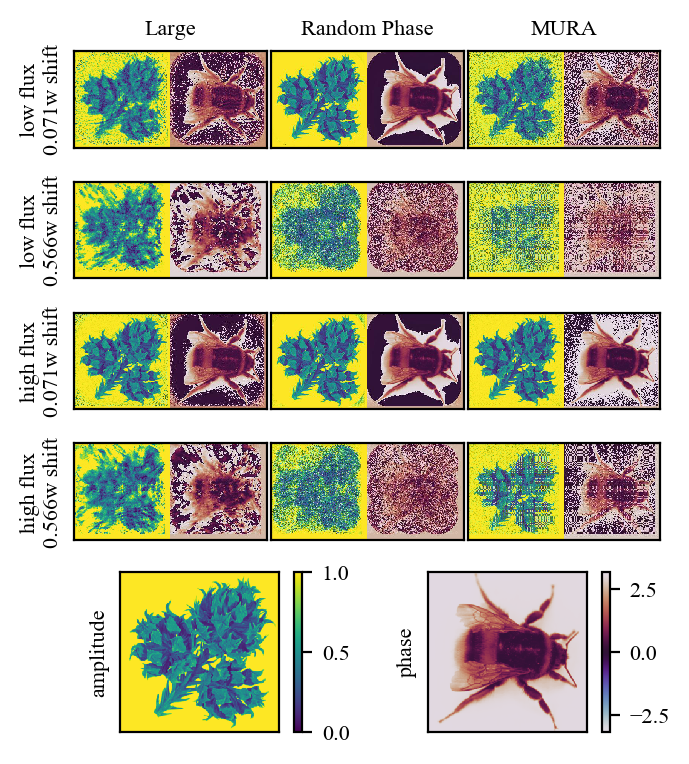

In [38]:
plt.figure(figsize=(3.37, 3.37 * 4.5/4), dpi=200)
grid_summary_fig('', 'amp')
grid_summary_fig('r', 'amp', col=1)
grid_summary_fig('m', 'amp', col=2)

plt.savefig('figures/grid.pdf', dpi=600)

In [ ]:
plt.figure(figsize=(3.37, 3.37), dpi=200)
grid_fig('m', 'amp')
plt.savefig('figures/grid-m-amp.pdf', dpi=600)

In [ ]:
plt.figure(figsize=(3.37, 3.37), dpi=200)
grid_fig('m', 'phz')
plt.savefig('figures/grid-m-phz.pdf', dpi=600)

In [ ]:
plt.figure(figsize=(3.37, 3.37), dpi=200)
grid_fig('', 'amp')
plt.savefig('figures/grid-g-amp.pdf', dpi=600)

In [ ]:
plt.figure(figsize=(3.37, 3.37), dpi=200)
grid_fig('r', 'amp')
plt.savefig('figures/grid-r-amp.pdf', dpi=600)

In [ ]:
plt.figure(figsize=(3.37, 3.37), dpi=200)
grid_fig('d', 'amp')
plt.savefig('figures/grid-d-amp.pdf', dpi=600)